## Exploratory data analysis (EDA)

# Table of Contents

1. [Problem Statement](#section1)
2. [Data Loading and Description](#section2)
3. [Data Profiling](#section3)
    - 3.1 [Understanding the Dataset](#section301)
    - 3.2 [Pre Profiling](#section302)
    - 3.3 [Preprocessing](#section303)
    - 3.4 [Post Profiling](#section304)
4. [Questions](#section4)
    - 4.1 [What are the different age group of patients?](#section401)
    - 4.2 [Of all the patients, how many survived?](#section402)
    - 4.3 [Which age group patients survived?](#section403)
    - 4.4 [What is the number of positive axillary nodes found in patients?](#section404)
    - 4.5 [Rate of survival with respect to Cancer stage(Positive axillary nodes)](#section405)
    - 4.6 [What is the survival rate with respect to Age group and Positive axillary nodes?](#section406)
    - 4.7 [Observing the survival rate with respect to years of operation.](#section407)
    - 4.8 [Calculating survival rate with respect to year of operation and Cancer stage. ](#section408)
    - 4.9 [Draw pair plot to know the joint relationship between 'Age','Pos_axillary_nodes''Years_of_operation' and              'Survived'.](#section409)
    - 4.10 [Establish correlation between all the features using heatmap.](#section410)
    - 4.11 [Hypothesis](#section411)
5. [Conclusions](#section5)

### Breast Cancer survival

### 1. Problem Statement
<a id="section1"></a>

The notebooks explores the basic use of __Pandas__ and will cover the basic commands of __Exploratory Data Analysis(EDA)__ which includes __cleaning__, __munging__, __combining__, __reshaping__, __slicing__, __dicing__, and __transforming data__ for analysis purpose.

* __Exploratory Data Analysis__
Understand the data by EDA and derive simple models with Pandas as baseline.
EDA ia a critical and first step in analyzing the data and we do this for below reasons :
    - Finding patterns in Data
    - Determining relationships in Data
    - Checking of assumptions
    - Preliminary selection of appropriate models
    - Detection of mistakes 

### 2. Data Loading and Description
<a id="section2"></a>

##### Breast Cancer survival
Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.


#### Attribute Information:
1. Age of patient at time of operation (numerical) 
2. Patient's year of operation (year - 1900, numerical) 
3. Number of positive axillary nodes detected (numerical) 
4. Survival status (class attribute) 
-- 1 = the patient survived 5 years or longer 
-- 2 = the patient died within 5 year

#### The objective is to predict whether the patient will survive after 5 years or not based upon the patient’s age, year of operation and the number of positive axillary nodes.


### Importing Packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling


### Loading the dataset

In [2]:
df1 = pd.read_csv("C:\\Users\\Yash\\Python my work\\My work\\Project Data\\Breast_cancer_survival.csv")
df1

,Age,Years_of_operation,Pos_axillary_nodes,Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


## 3. Data Profiling
<a id="section3"></a>

- In the upcoming sections we will first __understand our dataset__ using various pandas functionalities.
- Then with the help of __pandas profiling__ we will find which columns of our dataset need preprocessing.
- In __preprocessing__ we will deal with erronous and missing values of columns. 
- Again we will do __pandas profiling__ to see how preprocessing have transformed our dataset.

### 3.1 Understanding the Dataset
<a id="section301."></a>

To gain insights from data we must look into each aspect of it very carefully. We will start with observing few rows and columns of data both from the starting and from the end

In [3]:
df1.shape

(306, 4)

In [4]:
df1.columns

Index(['Age', 'Years_of_operation', 'Pos_axillary_nodes', 'Status'], dtype='object')

In [5]:
df1.head()

,Age,Years_of_operation,Pos_axillary_nodes,Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age                   306 non-null int64
Years_of_operation    306 non-null int64
Pos_axillary_nodes    306 non-null int64
Status                306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [7]:
df1.describe()

,Age,Years_of_operation,Pos_axillary_nodes,Status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [8]:
df1.isnull().sum()

Age                   0
Years_of_operation    0
Pos_axillary_nodes    0
Status                0
dtype: int64

#### From above:
- There are no missing values in this data set. So there is no need to do data manipulation.
- The datatype of ‘survival status after 5 years’ column is integer. It has to be converted to categorical datatype.
- The values of ‘survival status after 5 years’ column are mapped to survived and died.

### 3.2 Pre_Profiling
<a id="section302"></a>

- By pandas profiling, an interactive HTML report gets generated which contins all the information about the columns 
of the dataset, like the counts and type of each column. Detailed information about each column, 
coorelation between different columns and a sample of dataset.
- It gives us visual interpretation of each column in the data.
- _Spread of the data_ can be better understood by the distribution plot. 
- _Grannular level_ analysis of each column.

In [9]:
profile = pandas_profiling.ProfileReport(df1)
profile.to_file(outputfile="Survival_before_preprocessing.html")
profile

Number of variables,4
Number of observations,306
Total Missing (%),0.0%
Total size in memory,9.6 KiB
Average record size in memory,32.3 B
Numeric,3
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,0


### 3.3 Preprocessing
<a id="section303"></a>

- Dealing with values/adding new columns:
    - Adding one column "Survival" to change "Status" column to "Survived" or "Died" after operated. 
    - Adding one column "Age group" to get 3 age groups "Young  adulthood"(Age<45),"Middle age"(Age between 45 to 65) 
    and "Old"(Age>65) to understand data better.
    - Adding one more column "Cancer stage" from column "Pos_axillary_nodes" to stage "I" (Nodes<=10),"II"(Nodes btween 10-20) 
    & "III" (Nodes > 20) to get more 
    

In [10]:
df1["Survival"] = df1.apply(lambda x : "Survived" if x["Status"]==1 else "Died",axis=1)

In [11]:
df1["Age group"] = df1.apply(lambda x : "Young adulthood" if x["Age"] <=40 else ("Middle age" if (x["Age"]>40 and x["Age"]<=65) else ("Old" if (x["Age"]>65) else "none")),axis=1)

In [12]:
df1["Cancer stage"] = df1.apply(lambda x: "I" if x["Pos_axillary_nodes"]<=10 else ("II" if (x["Pos_axillary_nodes"] > 10 and x["Pos_axillary_nodes"] <=20) else ("III" if (x["Pos_axillary_nodes"]>20)  else "none")),axis=1)

In [13]:
df1["Years"] = df1.apply(lambda x : "Operated before 1960" if x["Years_of_operation"]<=60 else ("Operated after 1965" if (x["Years_of_operation"]>65) else "None"),axis=1)

### 3.4 Post_Profiling
<a id="section304"></a>

In [14]:
profile = pandas_profiling.ProfileReport(df1)
profile.to_file(outputfile="Survival_after_preprocessing.html")
profile

Number of variables,8
Number of observations,306
Total Missing (%),0.0%
Total size in memory,19.2 KiB
Average record size in memory,64.3 B
Numeric,3
Categorical,4
Boolean,1
Date,0
Text (Unique),0
Rejected,0


##### Now we have preprocessed the data,we have introduced new columns named "Survived","Age group" & "Cancer stage".So,the pandas profiling report which we have generated after preprocessing will give us more beneficial insights.

# 4.Questions:
<a id="section4"></a>

### 4.1. What are the different age group of patients?
<a id="section401"></a>

###### According to the additional column "Age group" 

Text(0.5, 1.0, 'Count plot for age groups')

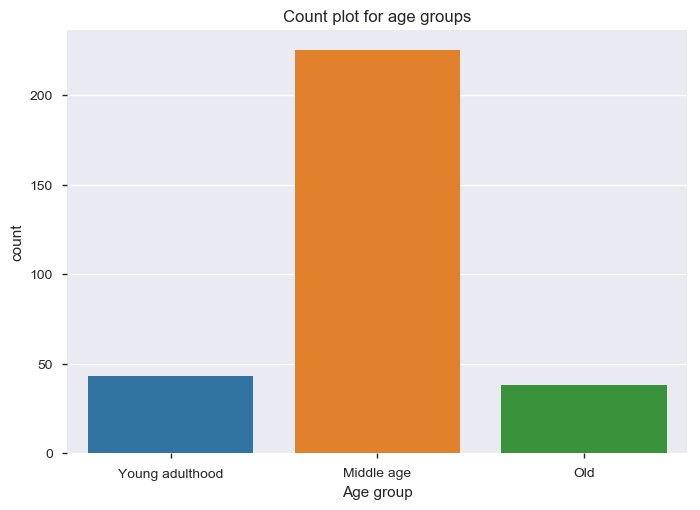

In [15]:
sns.countplot(x='Age group', data= df1).set_title('Count plot for age groups')

In [16]:
df1.groupby(['Age group'])['Age group'].count()

Age group
Middle age         225
Old                 38
Young adulthood     43
Name: Age group, dtype: int64

#### Observation:
- Young patients are 43,Middle age are 225 and old are 38.
- From this data, we conclude that mostly the patients are in the age of 40 to 65 years.

### 4.2. Of all the patients, how many survived?
<a id="section402"></a>

In [17]:
df1.groupby(['Status'])['Status'].count()

Status
1    225
2     81
Name: Status, dtype: int64

Text(0.5, 1.0, 'Count plot of patient survived')

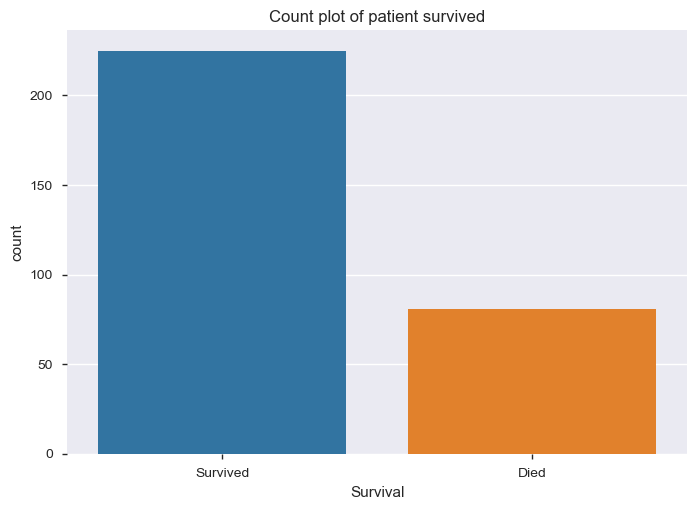

In [18]:
import seaborn as sns

sns.countplot(x='Survival', data= df1).set_title('Count plot of patient survived')

### Observation:
1.  From above graph, 225 patients surived for more than 5 years and 81 died within 5 years.
2.  73% patients survived after 5years of operation.

### 4.3.Which age group patients survived?
<a id="section403"></a>

C:\Ankita\Anaconda\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Ankita\Anaconda\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Factor plot of survived or died with respect to Age')

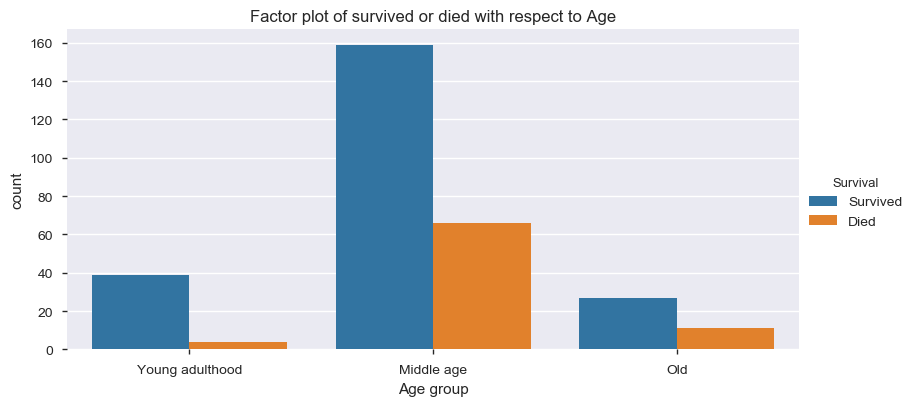

In [19]:
sns.factorplot('Age group', hue='Survival', kind='count', data=df1, size=4,aspect=2);
plt.title('Factor plot of survived or died with respect to Age')

- Using groupby

In [20]:
df1.groupby(["Age group","Survival"])["Survival"].count()

Age group        Survival
Middle age       Died         66
                 Survived    159
Old              Died         11
                 Survived     27
Young adulthood  Died          4
                 Survived     39
Name: Survival, dtype: int64

- Using Pie plot

Text(0.5, 1.0, 'Survival (Old)')

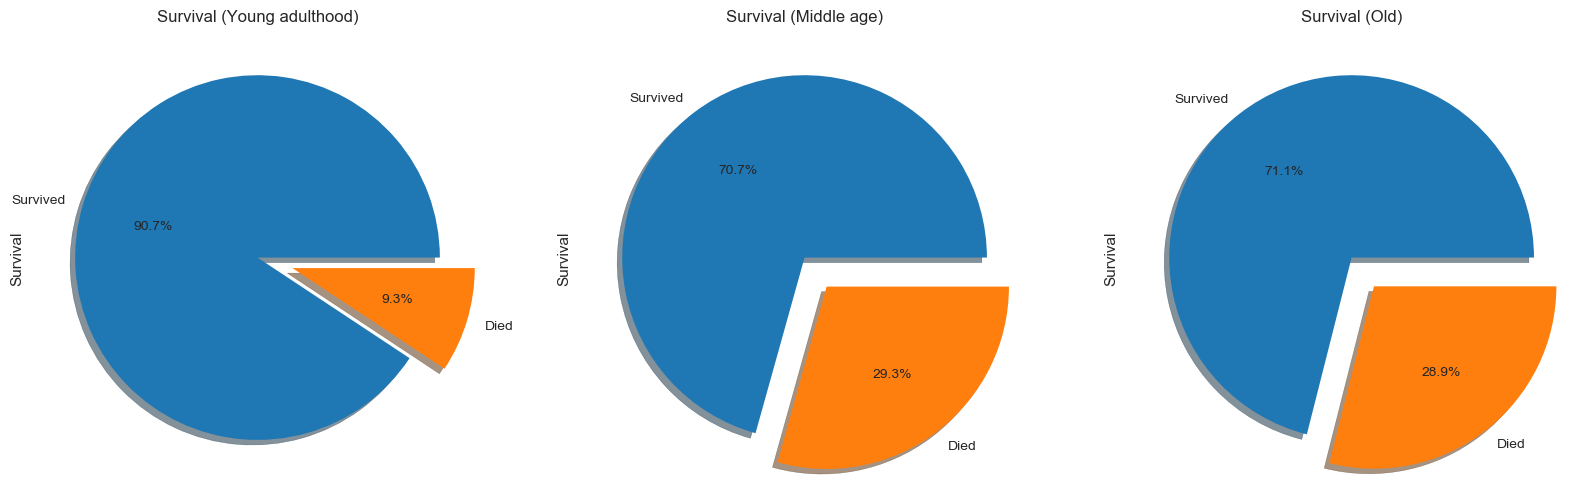

In [21]:
f,ax = plt.subplots(1,3,figsize=(20,7))
df1['Survival'][df1['Age group'] == 'Young adulthood'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
df1['Survival'][df1['Age group'] == 'Middle age'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
df1['Survival'][df1['Age group'] == 'Old'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[2],shadow=True)
ax[0].set_title('Survival (Young adulthood)')
ax[1].set_title('Survival (Middle age)')
ax[2].set_title('Survival (Old)')

### Observation:
From above graph
- In young adulthood (Age below 40), 90% patients survived hence the chances of survival is more.
- In middle age(age between 40-65), 70% patients survived.
- In old age(Age above 65), 71% patients survived.

### 4.4. What is the number of positive axillary nodes found in patients?
<a id="section404"></a>

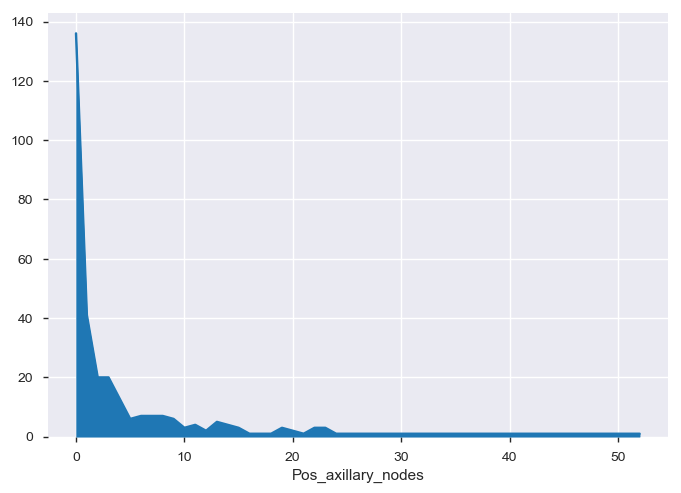

In [22]:
df1.groupby(["Pos_axillary_nodes"])["Pos_axillary_nodes"].count().plot.area()

In [23]:
df1.groupby(["Cancer stage"])["Cancer stage"].count()

Cancer stage
I      266
II      26
III     14
Name: Cancer stage, dtype: int64

In [24]:
df1.groupby(["Pos_axillary_nodes","Survival"])["Survival"].count()

Pos_axillary_nodes  Survival
0                   Died         19
                    Survived    117
1                   Died          8
                    Survived     33
2                   Died          5
                    Survived     15
3                   Died          7
                    Survived     13
4                   Died          3
                    Survived     10
5                   Died          4
                    Survived      2
6                   Died          3
                    Survived      4
7                   Died          2
                    Survived      5
8                   Died          2
                    Survived      5
9                   Died          4
                    Survived      2
10                  Died          1
                    Survived      2
11                  Died          3
                    Survived      1
12                  Died          1
                    Survived      1
13                  Died          4

#### Observation:
From this graph, 
- Almost 87% patients has 0-10 numbers of positive axillary nodes.

### 4.5. Rate of survival with respect to Cancer stage(Positive axillary nodes)
<a id="section405"></a>

C:\Ankita\Anaconda\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Ankita\Anaconda\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Factor plot of survived or died with respect to Cancer stage')

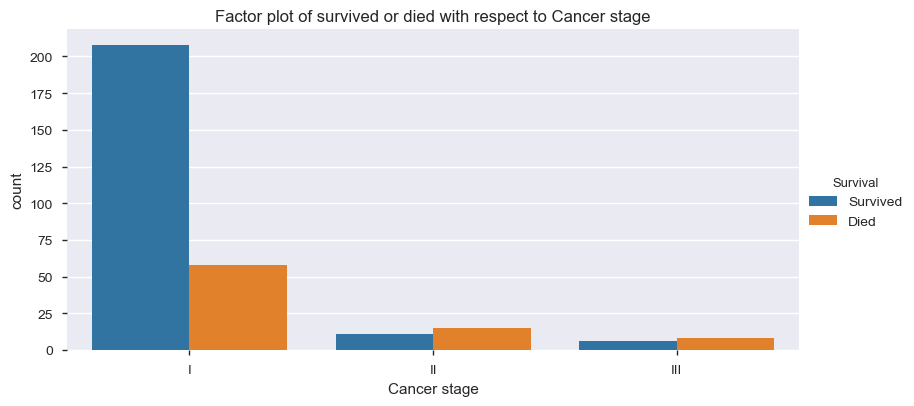

In [25]:
sns.factorplot(x='Cancer stage', hue='Survival', kind='count', data=df1, size=4,aspect=2,order=["I","II","III"]);
plt.title('Factor plot of survived or died with respect to Cancer stage')

- Using groupby

In [26]:
df1.groupby(["Survival","Cancer stage"])["Survival"].count()

Survival  Cancer stage
Died      I                58
          II               15
          III               8
Survived  I               208
          II               11
          III               6
Name: Survival, dtype: int64

### Analyzing survival rate with Cancer stage.

C:\Ankita\Anaconda\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Ankita\Anaconda\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Ankita\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Survival rate by Cancer stage')

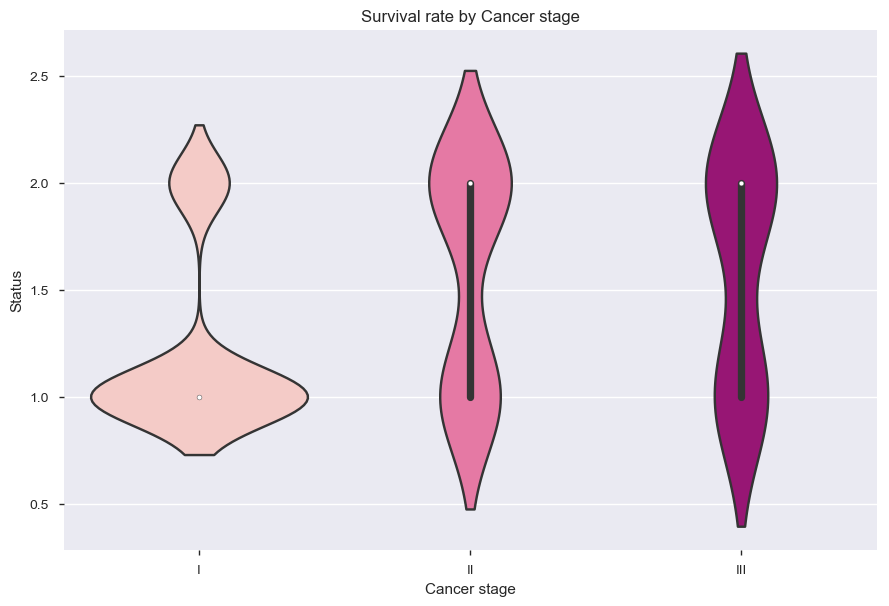

In [27]:
sr = sns.factorplot(x='Cancer stage', y='Status', data= df1, kind='violin', aspect=1.5, size=6, palette="RdPu",order=["I","II","III"])
sr.set(ylabel='Status')
plt.title('Survival rate by Cancer stage')

#### Observation
From above graph,
- Survival rate of Ist stage cancer is high as compare to 2nd and 3rd stage.
- In IInd & IIIrd stage,Survival rate & patients died within 5years has almost same ratio.

- Using pie plot

Text(0.5, 1.0, 'Survival (Nodes>20)')

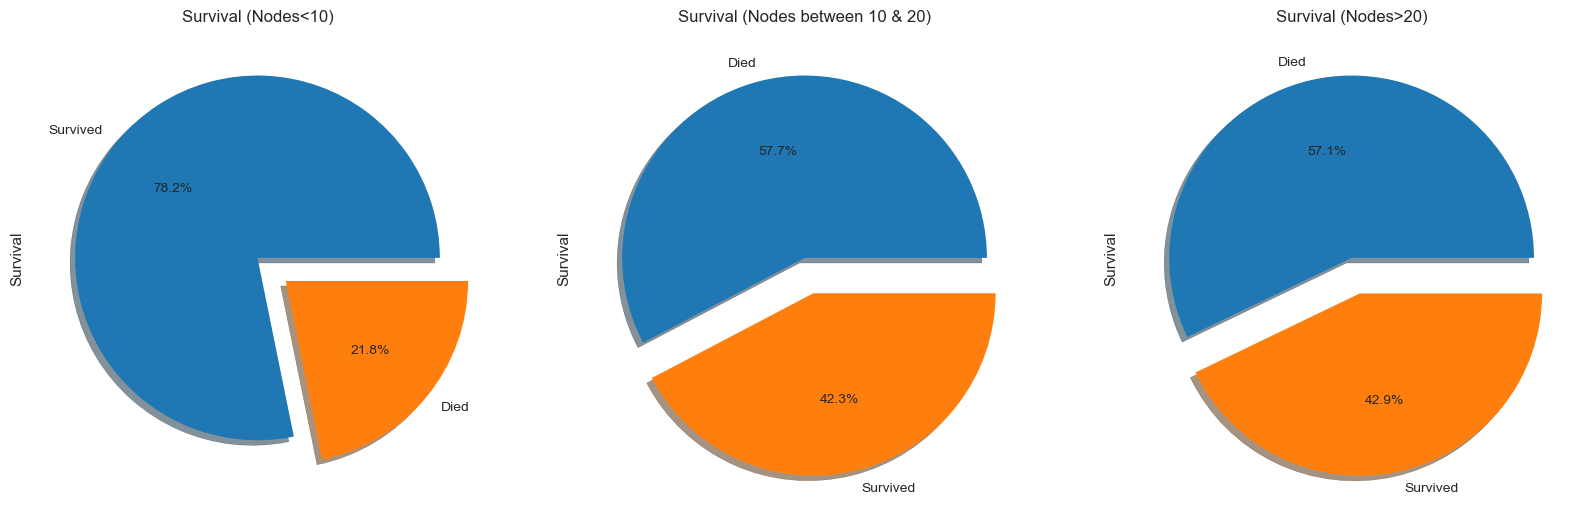

In [28]:
f,ax = plt.subplots(1,3,figsize=(20,7))
df1['Survival'][df1['Cancer stage'] == 'I'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
df1['Survival'][df1['Cancer stage'] == 'II'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
df1['Survival'][df1['Cancer stage'] == 'III'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[2],shadow=True)
ax[0].set_title('Survival (Nodes<10)')
ax[1].set_title('Survival (Nodes between 10 & 20)')
ax[2].set_title('Survival (Nodes>20)')

Text(0.5, 1.0, 'Survival (With 0 node)')

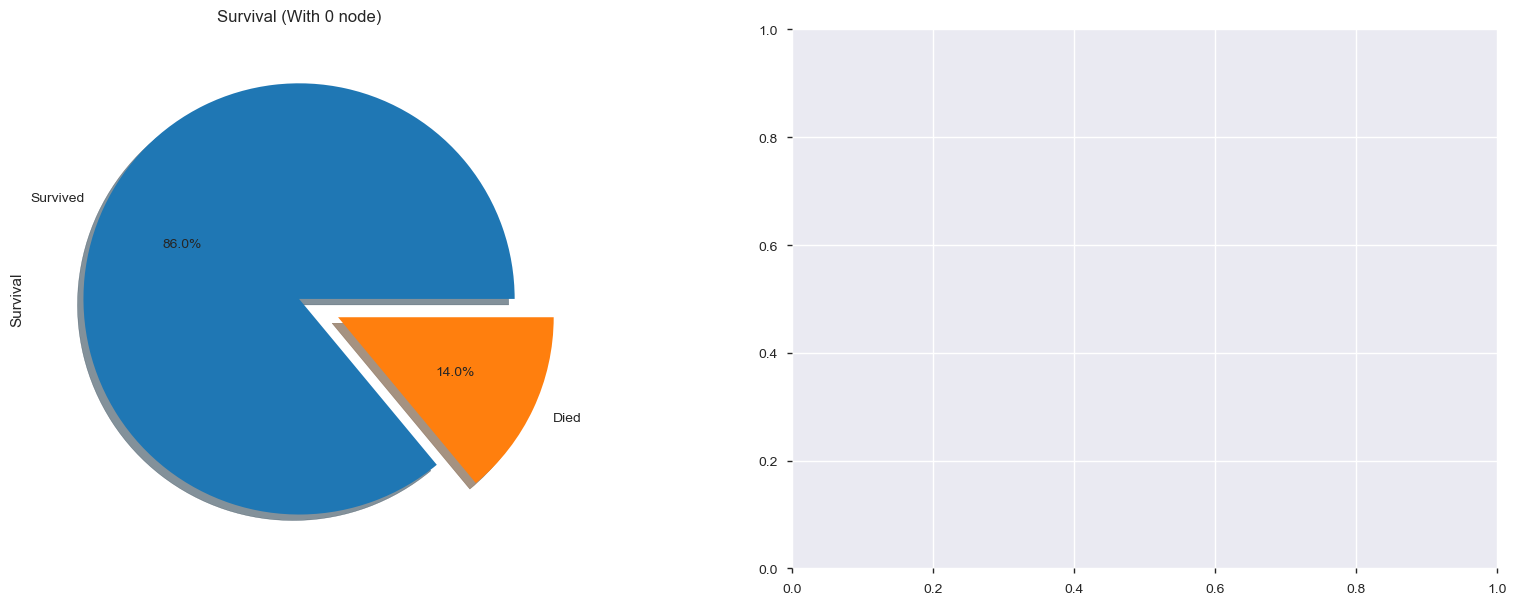

In [29]:
f,ax = plt.subplots(1,2,figsize=(20,7))
df1['Survival'][df1['Pos_axillary_nodes'] == 0].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survival (With 0 node)')

#### Observation:
From above graph,
- 78% patients survived with less than 10 positive axillary nodes.
- With positive axillary nodes greater than 20, more patients died than survived.
- Maximum nodes found in patients is 52, almost 87% patients have less than 10 positive axillary nodes.
- 44% patients have no positive axillary nodes and their survivalrate 86%

### 4.6.What is the survival rate with respect to Age group and Positive axillary nodes?
<a id="section406"></a>

In [30]:
df1.groupby(["Age group","Cancer stage","Survival"])["Survival"].count()

Age group        Cancer stage  Survival
Middle age       I             Died         45
                               Survived    147
                 II            Died         14
                               Survived      7
                 III           Died          7
                               Survived      5
Old              I             Died         10
                               Survived     26
                 II            Died          1
                               Survived      1
Young adulthood  I             Died          3
                               Survived     35
                 II            Survived      3
                 III           Died          1
                               Survived      1
Name: Survival, dtype: int64

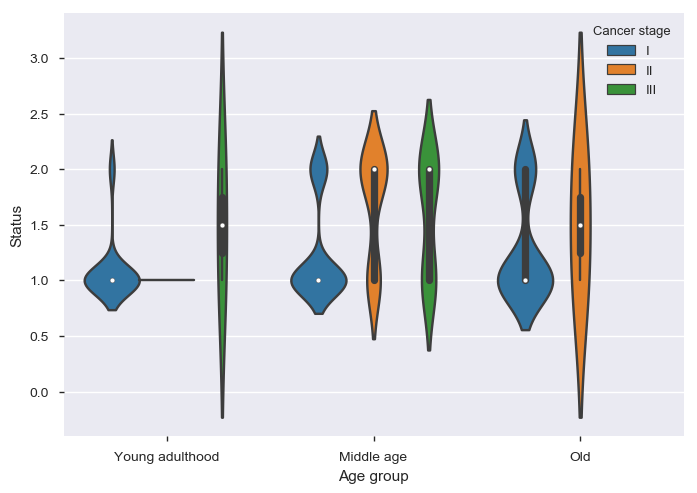

In [31]:
sns.violinplot(x = "Age group", y = "Status", hue = "Cancer stage", data = df1, hue_order=["I","II","III"])
plt.show()

#### Observation:
###### In Young Adulthood(Age<40):
- 92% patients survived of nodes less than 10.

###### In Middle age(Age between 40-65):
- 76% patients survived with less than 10 positive axillary nodes.

###### In Old(Age greater than 65):
- 72% patients survived with less than 10 positive axillary nodes.
- No patient found with more than 20 nodes in old age.

### 4.7.Observing the survival rate with respect to years of operation.
<a id="section407"></a>

##### Count of number of operations per year. 

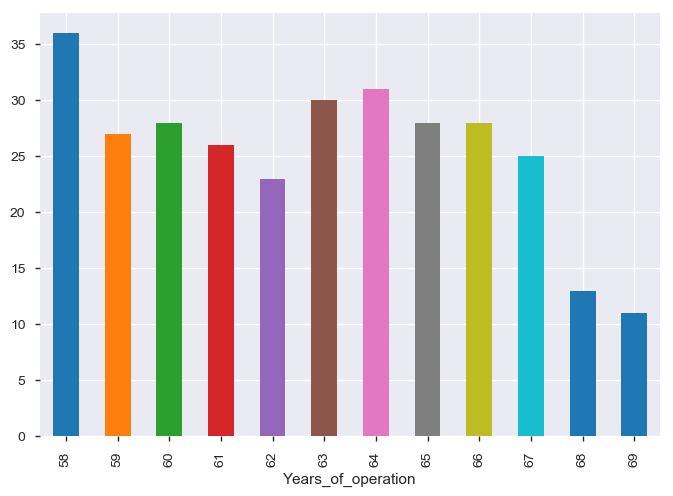

In [32]:
df1.groupby(["Years_of_operation"])["Years_of_operation"].count().plot.bar()

- Year 1958 has highest number of operations

##### Observing the survival rate with respect to years of operation

- Using groupby

In [33]:
df1.groupby(["Years_of_operation","Survival"])["Survival"].count()

Years_of_operation  Survival
58                  Died        12
                    Survived    24
59                  Died         9
                    Survived    18
60                  Died         4
                    Survived    24
61                  Died         3
                    Survived    23
62                  Died         7
                    Survived    16
63                  Died         8
                    Survived    22
64                  Died         8
                    Survived    23
65                  Died        13
                    Survived    15
66                  Died         6
                    Survived    22
67                  Died         4
                    Survived    21
68                  Died         3
                    Survived    10
69                  Died         4
                    Survived     7
Name: Survival, dtype: int64

C:\Ankita\Anaconda\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Ankita\Anaconda\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Factor plot of survived or died with respect to years of operation')

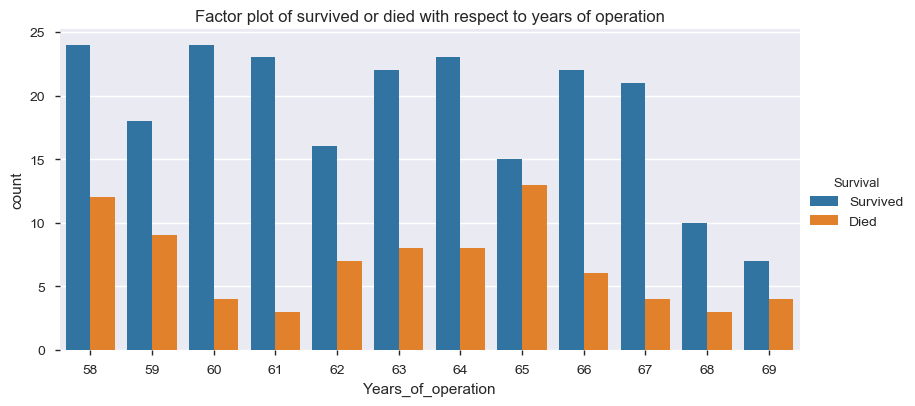

In [34]:
sns.factorplot(x='Years_of_operation', hue='Survival', kind='count', data=df1, size=4,aspect=2);
plt.title('Factor plot of survived or died with respect to years of operation')

#### Observation
- From year 1958 to 1961,rate of patients died is getting lower.
- From year 1962 to 64,survival rate is getting higher.
- Then,year 1966 onwards again the rate of patients died is getting lower.

### 4.8 Calculating survival rate with respect to year of operation and Cancer stage. 
<a id="section408"></a>

Text(0.5, 1.0, 'Survival (Operated after 1965)')

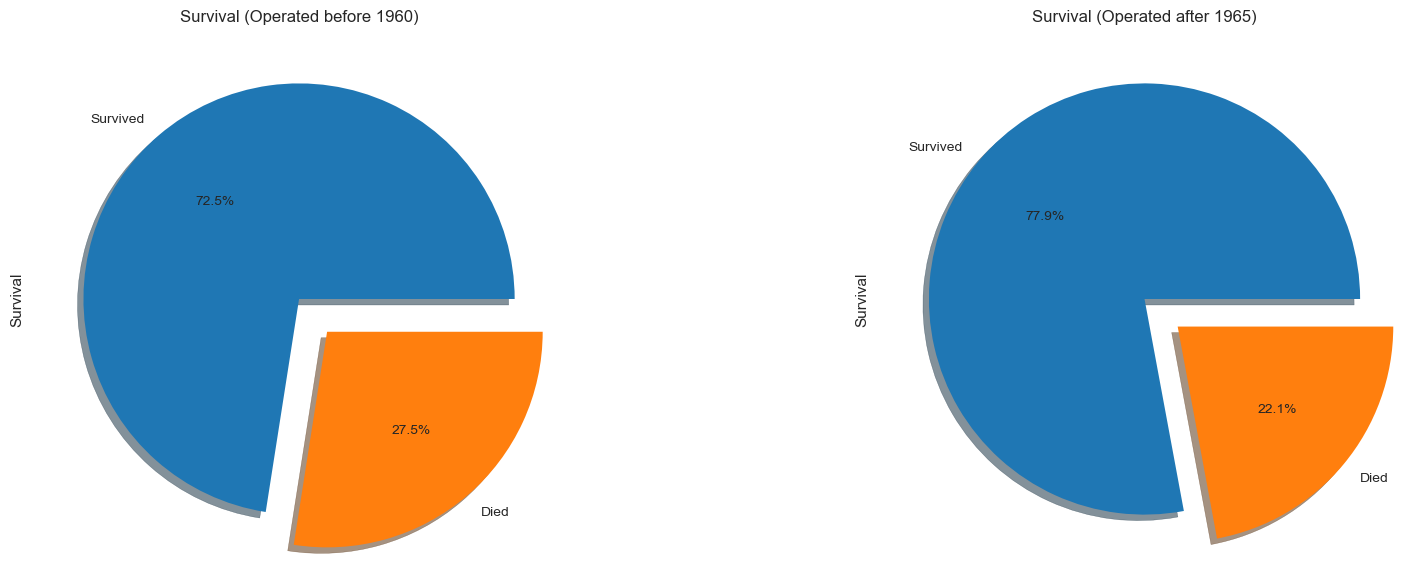

In [35]:
f,ax = plt.subplots(1,2,figsize=(20,7))
df1['Survival'][df1['Years'] == 'Operated before 1960'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
df1['Survival'][df1['Years'] == 'Operated after 1965'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[0].set_title('Survival (Operated before 1960)')
ax[1].set_title('Survival (Operated after 1965)')

- Using plots

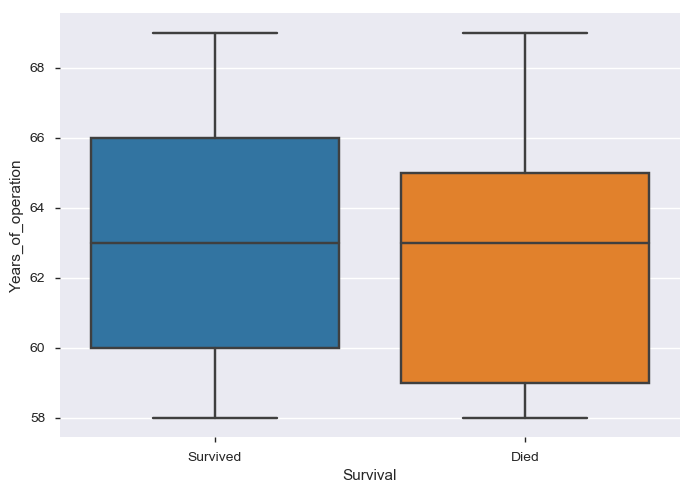

In [36]:
sns.boxplot( x='Survival', y= "Years_of_operation", data=df1)
plt.show()

### Observation:
- The patients treated after 1965 have the slighlty higher chance to surive that the rest. The patients treated before 1960 have the slighlty lower chance to surive that the rest(ie 6%)
- The patients operated before 1965 have 72% survival rate wherein patients operated after 1965 have 78% survival rate so the difference is 6%.

### 4.9. Draw pair plot to know the joint relationship between 'Age','Pos_axillary_nodes''Years_of_operation' and 'Survived'
<a id="section409"></a>

Text(0.5, 1.0, 'Pair Plot')

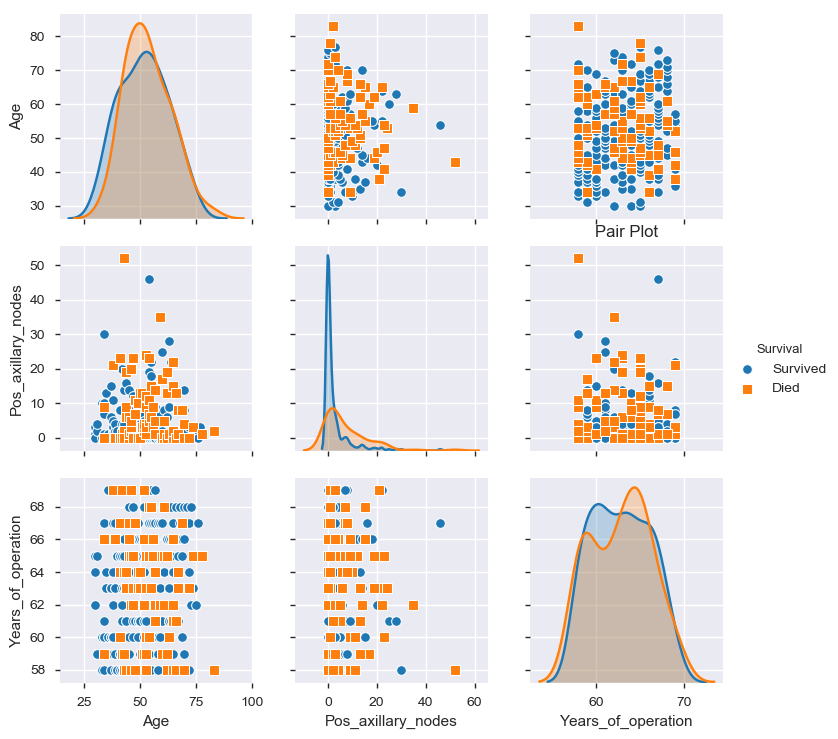

In [37]:
sns.pairplot(df1[["Age","Pos_axillary_nodes","Years_of_operation","Survival"]],vars = ["Age","Pos_axillary_nodes","Years_of_operation"],hue="Survival", dropna=True,markers=["o", "s"])
plt.title('Pair Plot')

#### Observing digonal elements:

- Most patients of age group 70-90 died than survived.
- Patients with 0-20 positive axillary nodes survived than died, 20-40 nodes died more tha survived.
- Patients who operated in year 1965, the ratio of died & survived is almost same.

### 4.10.Establish correlation between all the features using heatmap.
<a id="section410"></a>

Text(0.5, 1.0, 'Correlation between features')

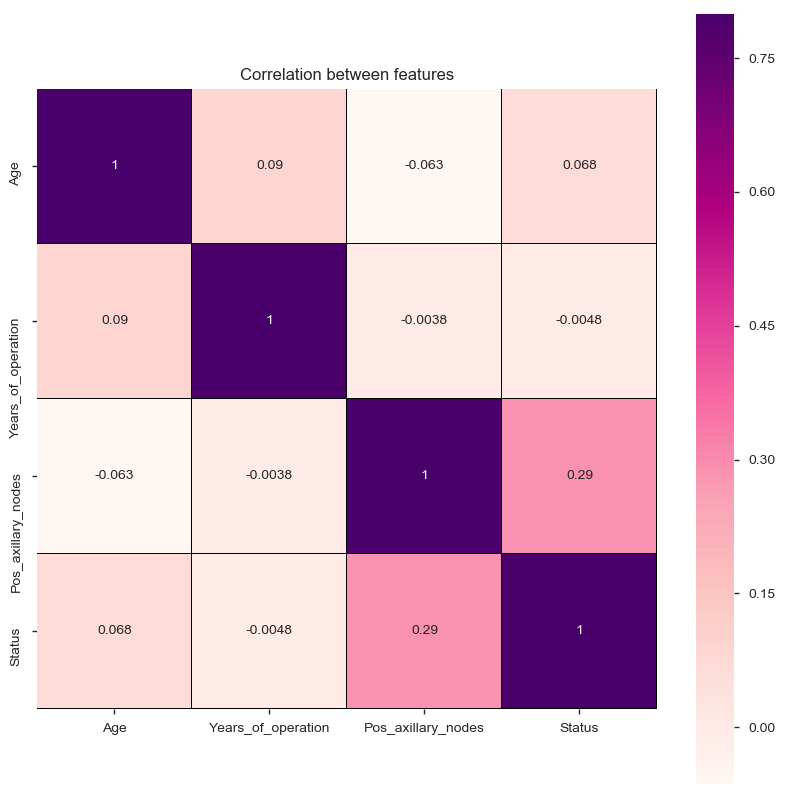

In [38]:
corr = df1.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='RdPu',linecolor ='black')
plt.title('Correlation between features')

### 4.11.Hypothesis
<a id="section411"></a>

- Of total,73% patients survived. 
- If we consider the age of patients then middle age group with age 40-65 years are more prone to this disease.
- Young age group(age less than 40) has better survival rate ie. 90%.
- Almost 87% patients have less than 10 positive axillary nodes.
- With axillary nodes less than 10,the survival rate is 78% but for nodes greater than 10 the survival rate is 42%.
- Maximum nodes found in patient is 52.
- 44% patients have 0 axillary nodes and survival rate with 0 axilary nodes is 86%.
- Years 1958 reported the maximum number of operations.
- The patients operated after 1965 have slightly higher rate of survival than patinets operated before 1960 (which is 6%).


## 5. Conclusion 
<a id="section5"></a>

- With the help of this notebook we learnt how exploratory data analysis can be carried out using Pandas plotting.
- Also we have seen making use of packages like __matplotlib and seaborn__ to develop better insights about the data.<br/>
- We have also seen how __preproceesing__ helps in dealing with _missing_ values and irregualities present in the data. We also learnt how to _create new features_ which will in turn help us to better predict the survival. 
- We also make use of __pandas profiling__ feature to generate an html report containing all the information of the various features present in the dataset.
- We have seen the impact of columns like __Age, Positive axillary nodes, Years of operation__ on the rate of survival.
- The most important inference drawn from all this analysis is, we get to know what are the features on which survival is highly positively and negatively coorelated with.
- This analysis will help us to choose which machine learning model we can apply to predict survival of test dataset. 